In [1]:
import pandas as pd
df  = pd.read_csv("Expanded_data_with_more_features.csv")

In [2]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,05-Oct,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,05-Oct,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,05-Oct,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,05-Oct,82,90,93


In [13]:
import pandas as pd
import re
# Assuming df is your DataFrame and 'original_column' is the column with distorted values
original_column = 'WklyStudyHours'
# Function to correct the values in the original column
def convert_to_range(value):
    if re.match(r'\d+-\d+', str(value)):
        return value
    elif re.match(r'\d+-[a-zA-Z]+', str(value)):
        day = int(re.search(r'\d+', str(value)).group())
        return f"{day:d}-{day+5:02d}"
    else:
        return value
# Apply the function to the original column
df[original_column] = df[original_column].apply(convert_to_range)
# Now, the 'original_column' has the corrected values
print(df[original_column])




0         < 5
1        5-10
2         < 5
3        5-10
4        5-10
         ... 
30636    5-10
30637    5-10
30638    5-10
30639    5-10
30640    5-10
Name: WklyStudyHours, Length: 30641, dtype: object


In [14]:
df


,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5-10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5-10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5-10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5-10,82,90,93


In [30]:
import pandas as pd

# Assuming df is your DataFrame
# columns_to_drop is a list of column names you want to drop
columns_to_drop = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 
                   'ParentMaritalStatus', 'IsFirstChild', 'NrSiblings', 'TransportMeans']

# Use the drop method to remove the specified columns
df = df.drop(columns=columns_to_drop)

In [31]:
df

,TestPrep,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,none,regularly,< 5,71,71,74
1,NaN,sometimes,05-Oct,69,90,88
2,none,sometimes,< 5,87,93,91
3,none,never,05-Oct,45,56,42
4,none,sometimes,05-Oct,76,78,75
...,...,...,...,...,...,...
30636,none,sometimes,05-Oct,59,61,65
30637,none,regularly,05-Oct,58,53,51
30638,completed,sometimes,05-Oct,61,70,67
30639,completed,regularly,05-Oct,82,90,93


In [32]:
df.isnull().sum()

TestPrep          1830
PracticeSport      631
WklyStudyHours     955
MathScore            0
ReadingScore         0
WritingScore         0
dtype: int64

In [33]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["WklyStudyHours"] = label_encoder.fit_transform(df["WklyStudyHours"])
# Encode "TestPrep" column
df["TestPrep"] = label_encoder.fit_transform(df["TestPrep"])
# Encode "PracticeSport" column
df["PracticeSport"] = label_encoder.fit_transform(df["PracticeSport"])

imputer = SimpleImputer(strategy="mean")

df["WklyStudyHours"] = imputer.fit_transform(df[["WklyStudyHours"]]).ravel()
# Fill null values in "TestPrep" column with mean
df["TestPrep"] = imputer.fit_transform(df[["TestPrep"]]).ravel()
# Fill null values in "PracticeSport" column with mean
df["PracticeSport"] = imputer.fit_transform(df[["PracticeSport"]]).ravel()



In [34]:
df.head()

,TestPrep,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,1.0,1.0,1.0,71,71,74
1,2.0,2.0,0.0,69,90,88
2,1.0,2.0,1.0,87,93,91
3,1.0,0.0,0.0,45,56,42
4,1.0,2.0,0.0,76,78,75


In [35]:
df.describe()

,TestPrep,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000,30641.000000
mean,0.734832,1.407004,0.701903,66.558402,69.377533,68.418622
std,0.560635,0.737499,0.857793,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000
25%,0.000000,1.000000,0.000000,56.000000,59.000000,58.000000
50%,1.000000,2.000000,0.000000,67.000000,70.000000,69.000000
75%,1.000000,2.000000,1.000000,78.000000,80.000000,79.000000
max,2.000000,3.000000,3.000000,100.000000,100.000000,100.000000


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['MathScore'],axis = 1))
scaled_features = scaler.transform(df.drop('MathScore',axis = 1))

In [38]:
X = scaled_features
Y = df['MathScore']
X= pd.DataFrame(data=X,columns = df.drop(columns=['MathScore']).columns)

In [39]:
X.corr()

,TestPrep,PracticeSport,WklyStudyHours,ReadingScore,WritingScore
TestPrep,1.000000,-0.006954,-0.003125,-0.169014,-0.235273
PracticeSport,-0.006954,1.000000,-0.007451,0.007067,0.007027
WklyStudyHours,-0.003125,-0.007451,1.000000,0.002223,0.010369
ReadingScore,-0.169014,0.007067,0.002223,1.000000,0.952584
WritingScore,-0.235273,0.007027,0.010369,0.952584,1.000000


In [40]:
#importing varience inflation factor from the stats model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
## calculating VIF for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

TestPrep           1.096725
PracticeSport      1.000140
WklyStudyHours     1.000813
ReadingScore      11.196925
WritingScore      11.515487
dtype: float64

In [42]:
def MC_remover(data):
    vif=pd.Series([variance_inflation_factor(data.values,i)for i in range(data.shape[1])],index=data.columns)
    if vif.max()>5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No multicollinearity present anymore")
        return data

In [43]:
from sklearn.model_selection import train_test_split
X = vif_data
Y = df['MathScore']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [44]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [45]:
reg.coef_

array([0.80742289, 0.20515088, 0.17522185, 7.68624593, 5.2720293 ])

In [46]:
pred = reg.predict(X_test)
pred

array([63.58699331, 71.40976567, 68.99590666, ..., 62.90688985,
       75.30456088, 54.53925703])

In [47]:
import statsmodels.api as sm
import numpy as np
from sklearn import metrics 

r2  = reg.score(X_test, Y_test)
MAE2 = metrics.mean_absolute_error(Y_test,pred)
MSE2 = metrics.mean_squared_error(Y_test,pred) 
RMSE2= (np.sqrt(metrics.mean_squared_error(Y_test, pred)))
MAPE2=metrics.mean_absolute_percentage_error(Y_test,pred)
VIF= 1/(1-r2)



print('r-squared: {}'.format(r2))
print('VIF: {}'.format(VIF))
print('---------------------------------------')
print('Mean absolute error: {}'.format(MAE2))
print('Mean squared error : {}'.format(MSE2))
print('Root mean squared error: {}'.format(RMSE2))
print('Mean  Absolute %  error: {}'.format(MAPE2))

r-squared: 0.678208581410255
VIF: 3.107603069039295
---------------------------------------
Mean absolute error: 7.178430252525637
Mean squared error : 76.67772072077913
Root mean squared error: 8.75658156592966
Mean  Absolute %  error: 0.11811338790539357


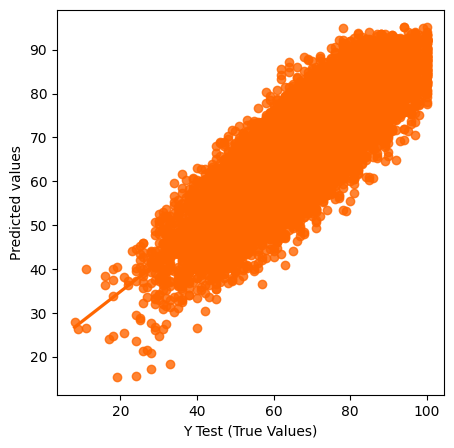

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.regplot(x = Y_test,y = pred, color='#FF6600')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()